In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import numpy as np
import os
import zipfile

In [2]:
local_zip = "data.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("./")
zip_ref.close()

Sample Happy:


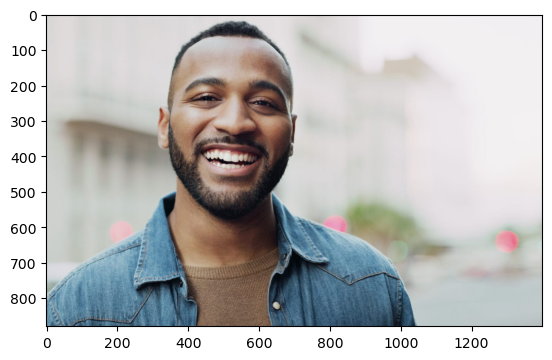

Sample Sad:


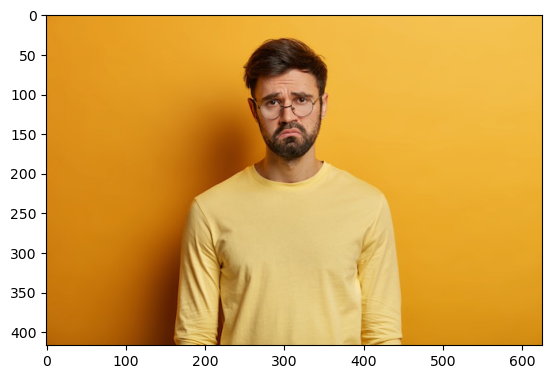

Sample Angry:


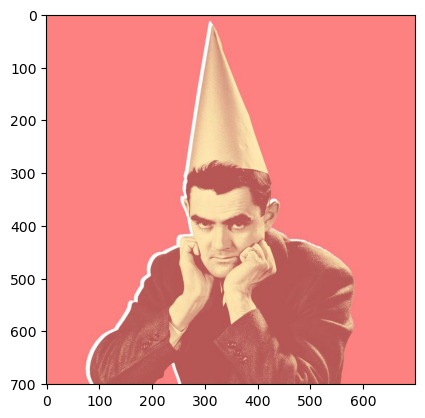

In [3]:
from tensorflow.keras.preprocessing.image import load_img

base_dir = "./data/"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")
angry_dir = os.path.join(base_dir, "angry/")

print("Sample Happy:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("Sample Sad:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

print("Sample Angry:")
plt.imshow(load_img(f"{os.path.join(angry_dir, os.listdir(angry_dir)[0])}"))
plt.show()

In [4]:
from tensorflow.keras.preprocessing.image import img_to_array

sample_image = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

sample_array = img_to_array(sample_image)

print(f"Image shape: {sample_array.shape}")
print(f"Image pixel: {np.max(sample_array)}")

Image shape: (880, 1400, 3)
Image pixel: 248.0


In [5]:
def tensor_to_image(tensor):
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)

In [6]:
from tensorflow import image

def resize_img(img):
    tensor_img = tf.convert_to_tensor(img)

    return tensor_to_image(
        image.resize_with_pad(
            tensor_img,
            150,
            150,
            method=image.ResizeMethod.BILINEAR,
            antialias=False
        )
    )

In [7]:
dirs = [happy_dir, sad_dir, angry_dir]

for dir in dirs:
    for i in os.listdir(dir):
        path = os.path.join(dir, i)
        img = resize_img(load_img(path))
        
        tf.keras.utils.save_img(path, img)
print("Successful")

Successful


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ])
    
    model.summary()
    
    model.compile(
        loss="categorical_crossentropy",
        optimizer=tf.optimizers.Adam(),
        metrics=["accuracy"]
    )
    
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get("accuracy") > .95:
                self.model.stop_training = True
                
    train_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(
        "data",
        target_size=(300,300),
        batch_size=32,
        class_mode="categorical"
    )
    
    callbacks = myCallback()
    
    history = model.fit(
        train_generator,
        steps_per_epoch=8,
        epochs=15,
        verbose=1,
        callbacks=callbacks
    )
    
    model.save("my_model")

In [9]:
if os.path.isfile("my_.odel"):
    model = load_model("my_model.keras")
else:
    train_model()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

INFO:tensorflow:Assets written to: myModel\assets
